<a href="https://colab.research.google.com/github/subhamyadav580/Data-Analysis-with-IPL-Dataset/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
!ls

drive  sample_data


In [7]:
%cd /content/drive/My Drive/kaggle/fastai/courses/ml1/

/content/drive/My Drive/kaggle/fastai/courses/ml1


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [9]:
PATH = 'data/IPL/'

In [10]:
!ls {PATH}

'IPL Ball-by-Ball 2008-2020.csv'  'IPL Matches 2008-2020.csv'


In [11]:
bobData = pd.read_csv(f'{PATH}IPL Ball-by-Ball 2008-2020.csv', low_memory=False)
matchData = pd.read_csv(f'{PATH}IPL Matches 2008-2020.csv', low_memory=False)

In [12]:
bobData.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [13]:
matchData.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [14]:
(bobData.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,193468,NaN,NaN,NaN,756769,306097,335982,501227,729297,1.08263e+06,1.23718e+06
inning,193468,NaN,NaN,NaN,1.48213,0.499682,1,1,1,2,2
over,193468,NaN,NaN,NaN,9.17703,5.67685,0,4,9,14,19
ball,193468,NaN,NaN,NaN,3.61597,1.80713,1,2,4,5,9
batsman,193468,537,V Kohli,4609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
non_striker,193468,530,S Dhawan,4593,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bowler,193468,420,Harbhajan Singh,3451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
batsman_runs,193468,NaN,NaN,NaN,1.24023,1.61087,0,0,1,1,6
extra_runs,193468,NaN,NaN,NaN,0.0664141,0.339991,0,0,0,0,7
total_runs,193468,NaN,NaN,NaN,1.30665,1.5988,0,0,1,1,7


# Data Cleaning

In [15]:
matchData.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [16]:
matchData.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

In [17]:
matchData.city.unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

In [18]:
matchData.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [19]:
matchData.team1.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'}, regex=True, inplace=True)

In [20]:
matchData.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiant', 'Delhi Capitals'],
      dtype=object)

In [21]:
matchData.team2.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [22]:
matchData.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kings XI Punjab', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [23]:
matchData.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [24]:
matchData.team2.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'}, regex=True, inplace=True)
matchData.toss_winner.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'}, regex=True, inplace=True)
matchData.winner.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'}, regex=True, inplace=True)

In [25]:
matchData.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [26]:
matchData.venue.replace({'M Chinnaswamy Stadium' : 'M.Chinnaswamy Stadium', 'Punjab Cricket Association IS Bindra Stadium, Mohali' : 'Punjab Cricket Association Cricket Stadium, Mohali'},regex=True, inplace=True)

In [27]:
matchData.venue.isnull().sum()

0

In [28]:
matchData.city.isnull().sum()

13

In [29]:
matchData['city'].fillna(matchData['venue'], inplace = True)

In [30]:
matchData.city.isnull().sum()

0

In [31]:
matchData.winner.isnull().sum()

4

In [32]:
matchData.result.unique()

array(['runs', 'wickets', 'tie', nan], dtype=object)

In [33]:
matchData[matchData.winner.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [34]:
matchData.winner.replace(np.nan,'tie', regex=True, inplace=True)

In [35]:
matchData[matchData.result.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,tie,NaN,NaN,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,tie,NaN,NaN,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,tie,NaN,NaN,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,tie,NaN,NaN,NaN,NaN,UV Gandhe,NJ Llong


In [36]:
matchData.result.replace(np.nan,'tie', regex=True, inplace=True)

In [37]:
matchData.result_margin.isnull().sum()

17

In [38]:
matchData[matchData.result_margin.isna()].head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,2009-04-23,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,tie,tie,NaN,NaN,NaN,SS Hazare,RJ Tucker
328,598004,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,2013-04-16,V Kohli,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni


In [39]:
matchData.result_margin.replace(np.nan,0.0, regex=True, inplace=True)

In [40]:
matchData.isnull().sum()

id                   0
city                 0
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               0
result               0
result_margin        0
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [41]:
matchData[matchData.eliminator.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,tie,tie,0.0,NaN,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,tie,tie,0.0,NaN,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,tie,tie,0.0,NaN,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,tie,tie,0.0,NaN,NaN,UV Gandhe,NJ Llong


In [42]:
matchData.eliminator.unique()

array(['N', 'Y', nan], dtype=object)

In [43]:
matchData.eliminator.replace(np.nan, 'N', regex=True, inplace=True)

In [44]:
matchData[matchData.player_of_match.isna()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
241,501265,Delhi,2011-05-21,NaN,Feroz Shah Kotla,0,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,tie,tie,0.0,N,NaN,SS Hazare,RJ Tucker
486,829763,Bangalore,2015-04-29,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,tie,tie,0.0,N,NaN,JD Cloete,PG Pathak
511,829813,Bangalore,2015-05-17,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,tie,tie,0.0,N,NaN,HDPK Dharmasena,K Srinivasan
744,1178424,Bengaluru,2019-04-30,NaN,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,tie,tie,0.0,N,NaN,UV Gandhe,NJ Llong


In [45]:
matchData.isnull().sum() / len(matchData)

id                 0.000000
city               0.000000
date               0.000000
player_of_match    0.004902
venue              0.000000
neutral_venue      0.000000
team1              0.000000
team2              0.000000
toss_winner        0.000000
toss_decision      0.000000
winner             0.000000
result             0.000000
result_margin      0.000000
eliminator         0.000000
method             0.976716
umpire1            0.000000
umpire2            0.000000
dtype: float64

In [46]:
matchData[matchData.method.notnull()].head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
40,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade


In [47]:
matchData.method.replace(np.nan, 'normal', regex=True, inplace=True)

In [48]:
matchData.player_of_match.replace(np.nan, 'None', regex=True, inplace=True)

In [49]:
matchData.isnull().sum() / len(matchData)

id                 0.0
city               0.0
date               0.0
player_of_match    0.0
venue              0.0
neutral_venue      0.0
team1              0.0
team2              0.0
toss_winner        0.0
toss_decision      0.0
winner             0.0
result             0.0
result_margin      0.0
eliminator         0.0
method             0.0
umpire1            0.0
umpire2            0.0
dtype: float64

In [50]:
matchData.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M.Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,normal,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,normal,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,normal,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,normal,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,normal,BF Bowden,K Hariharan


# Total number of matches till 2020

In [51]:
dateSplit = matchData['date'].str.split("-")
matchData['season'] = dateSplit.str.get(0)

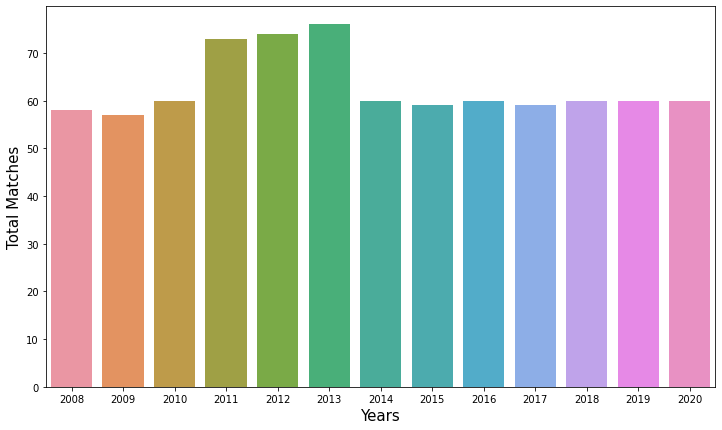

In [122]:
plt.figure(figsize=(12, 7))
sns.countplot(x=matchData.season)
plt.xlabel('Years', fontsize=15)
plt.ylabel('Total Matches', fontsize=15)
plt.show()

# **Total number of matches Win by Each Teams**

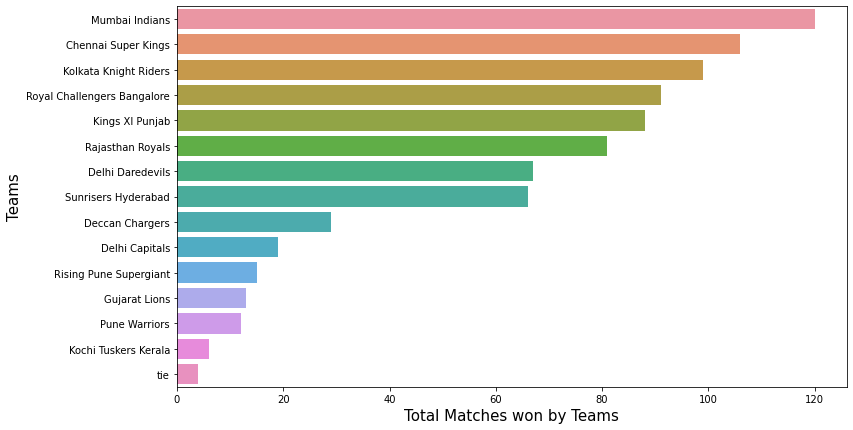

In [121]:
plt.figure(figsize=(12,7))
sns.countplot(y=matchData.winner, order=matchData.winner.value_counts().index)
plt.xlabel('Total Matches won by Teams', fontsize=15)
plt.ylabel('Teams', fontsize=15)
plt.show()

# **Does toss winning affects the match winner ?**

In [56]:
teams = list(matchData.toss_winner.value_counts().index)
toss_winners = list(matchData.toss_winner.value_counts())
match_winners = list(matchData.winner.value_counts())
match_winners.pop(len(match_winners)-1)

4

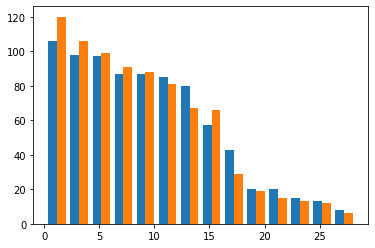

In [57]:
n = 1
t = 2
d = len(teams)
w = 0.8
x_values1 = [t*element + w*n for element in range(d)] 


n = 2
t = 2
d = len(teams)
w = 0.8
x_values2 = [t*element + w*n for element in range(d)] 


plt.bar(x_values1, toss_winners)
plt.bar(x_values2, match_winners)
plt.show()

# **Do you know who won the most player of the match?**

In [87]:
players = list(matchData.player_of_match.unique())
manOfMatchCount = matchData.player_of_match.value_counts()

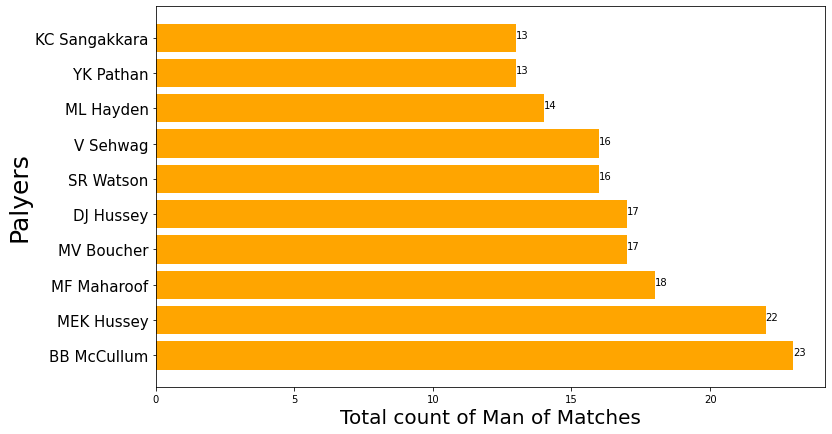

In [119]:
fig = plt.figure(figsize=(12, 7))

ax = fig.add_subplot()
plt.barh(range(len(players[0:10])), manOfMatchCount[0:10], color='orange')

ax.set_yticks(range(10))
ax.set_yticklabels(list(matchData.player_of_match.unique())[0:10], fontsize=15)
for index, value in enumerate(manOfMatchCount[0:10]):
    plt.text(value, index, str(value))
plt.xlabel('Total count of Man of Matches', fontsize=20)
plt.ylabel('Palyers', fontsize=25)
plt.show()